# 성능 개선

# 모듈 임포팅

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

# 모델 크기와 성능

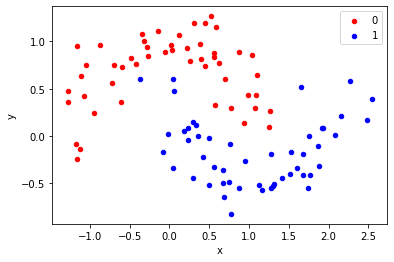

In [2]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=100, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


hidden layer node=5


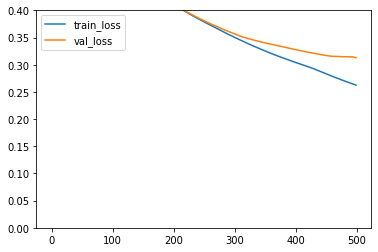


hidden layer node=10


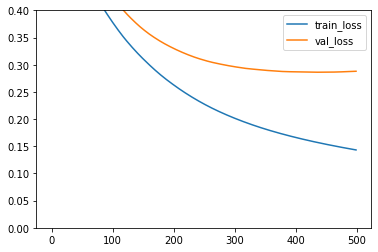


hidden layer node=20


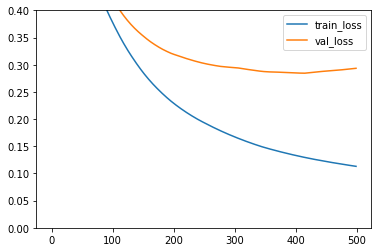


hidden layer node=30


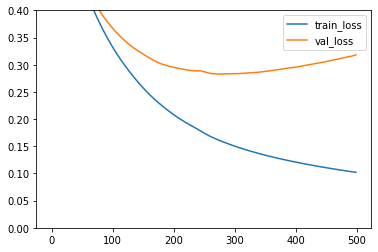


hidden layer node=40


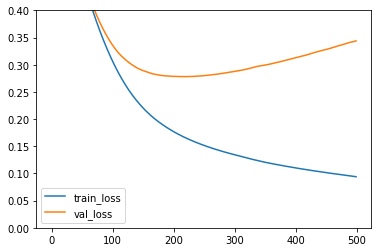


hidden layer node=50


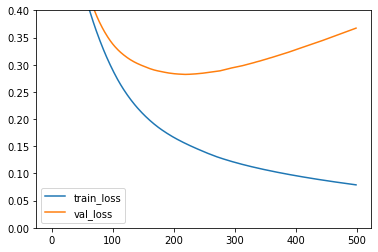


hidden layer node=100


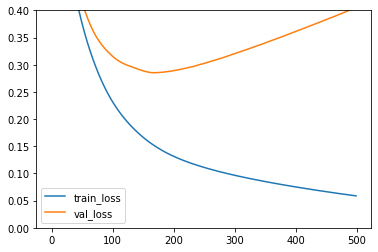


hidden layer node=200


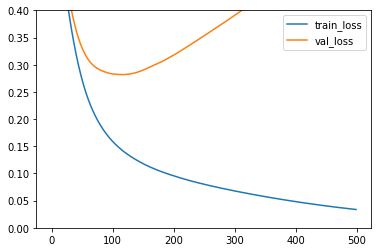


hidden layer node=500


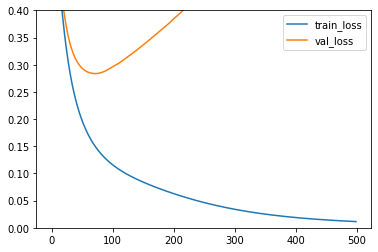


hidden layer node=1000


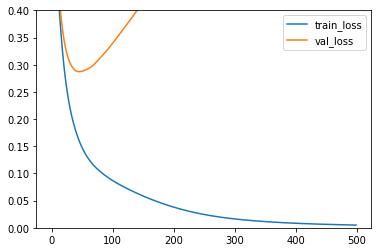


hidden layer node=5000


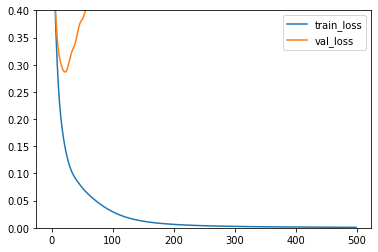

In [3]:
for node_size in [5, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 5000]:
  print("\nhidden layer node={}".format(node_size))
  model = Sequential()
  model.add(Input(2))
  model.add(Dense(node_size, activation='relu'))
  model.add(Dense(2, activation="softmax"))
  model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

  base_history = model.fit(train_x, train_y, epochs=500, batch_size=128, verbose=0, validation_split=0.2)

  plt.plot(base_history.history['loss'], label='train_loss')
  plt.plot(base_history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.ylim(0.0, 0.4)
  plt.show()



# 데이터 값 크기와 성능

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten

import time

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## 아무런 처리 없이

In [19]:
train_x = raw_train_x
test_x = raw_test_x

train_y = raw_train_y
test_y = raw_test_y

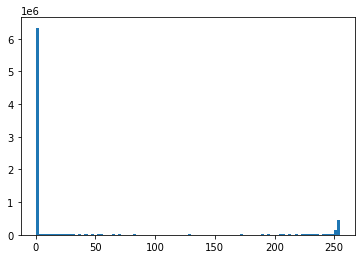

In [4]:
plt.hist(test_x.flatten(), bins=100)
plt.show()

In [17]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

base_history = model.fit(train_x, train_y, epochs=50, validation_split=0.1, batch_size=128)

Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5952 - accuracy: 0.8158 - val_loss: 0.5238 - val_accuracy: 0.8437
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.8259 - val_loss: 0.5330 - val_accuracy: 0.8433
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.8307 - val_loss: 0.4850 - val_accuracy: 0.8590
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.8409 - val_loss: 0.5185 - val_accuracy: 0.8413
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.8476 - val_loss: 0.4259 - val_accuracy: 0.8738
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8537 - val_loss: 0.4220 - val_accuracy: 0.8775
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.8593 - val_loss: 0.4508 - val_accuracy: 0.8675
Epoch 

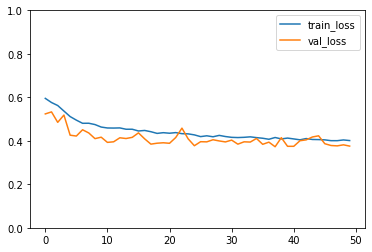

In [18]:
plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(0.0, 1.0)
plt.show()

## Normalization 적용

In [20]:
train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

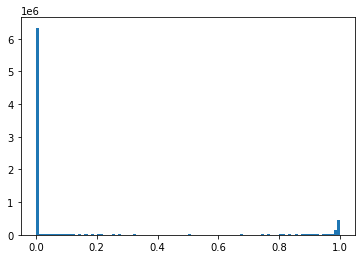

In [21]:
plt.hist(test_x.flatten(), bins=100)
plt.show()

In [22]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

normalized_history = model.fit(train_x, train_y, epochs=50, validation_split=0.1, batch_size=128)

Epoch 1/50
422/422 [==============================] - 1s 3ms/step - loss: 0.9485 - accuracy: 0.6878 - val_loss: 0.3467 - val_accuracy: 0.9070
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8941 - val_loss: 0.2749 - val_accuracy: 0.9223
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.9071 - val_loss: 0.2528 - val_accuracy: 0.9265
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.9141 - val_loss: 0.2353 - val_accuracy: 0.9317
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.9195 - val_loss: 0.2282 - val_accuracy: 0.9333
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.9220 - val_loss: 0.2222 - val_accuracy: 0.9352
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9245 - val_loss: 0.2192 - val_accuracy: 0.9363
Epoch 

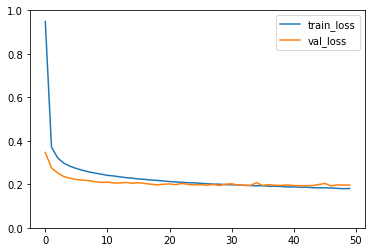

In [23]:
plt.plot(normalized_history.history['loss'], label='train_loss')
plt.plot(normalized_history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(0.0, 1.0)
plt.show()

## Standardization 적용

In [24]:
mean = np.mean(raw_train_x)
std = np.mean(raw_train_x)

train_x = (raw_train_x - mean) / std
test_x = (raw_test_x - mean) / std

train_y = raw_train_y
test_y = raw_test_y

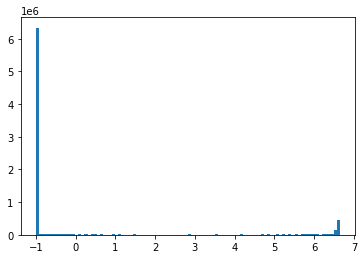

In [25]:
plt.hist(test_x.flatten(), bins=100)
plt.show()

In [26]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

standardization_history = model.fit(train_x, train_y, epochs=50, validation_split=0.1, batch_size=128)

Epoch 1/50
422/422 [==============================] - 1s 3ms/step - loss: 0.8783 - accuracy: 0.7035 - val_loss: 0.4090 - val_accuracy: 0.8777
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8851 - val_loss: 0.2873 - val_accuracy: 0.9150
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9091 - val_loss: 0.2478 - val_accuracy: 0.9288
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2811 - accuracy: 0.9193 - val_loss: 0.2353 - val_accuracy: 0.9340
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.9247 - val_loss: 0.2284 - val_accuracy: 0.9363
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.9275 - val_loss: 0.2172 - val_accuracy: 0.9398
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.9308 - val_loss: 0.2111 - val_accuracy: 0.9405
Epoch 

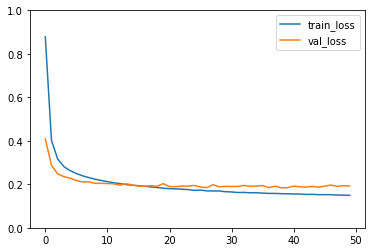

In [27]:
plt.plot(standardization_history.history['loss'], label='train_loss')
plt.plot(standardization_history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(0.0, 1.0)
plt.show()

In [ ]:
def create_data_with_total_size(total_data_count=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_data_count, noise=0.2, random_state=1)

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [ ]:
def show_loss(hidden_layer_node_size=500, total_data_count=100, train_ratio=0.8):

  print("\nhidden layer node size = {}, data count = {}".format(hidden_layer_node_size, total_data_count))
  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(hidden_layer_node_size, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  epochs = int(1000000 / total_data_count)
  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, verbose=0, batch_size=64)

  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='test_loss')
  plt.legend()
  plt.ylim(0.0, 0.6)
  plt.show()


hidden layer node size = 5, data count = 100


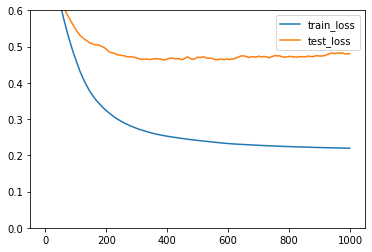


hidden layer node size = 10, data count = 100


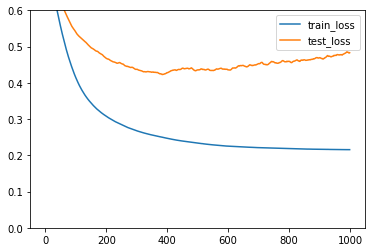


hidden layer node size = 20, data count = 100


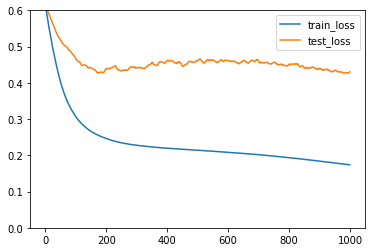


hidden layer node size = 30, data count = 100


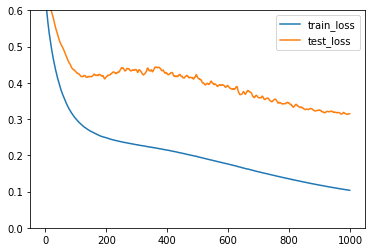


hidden layer node size = 40, data count = 100


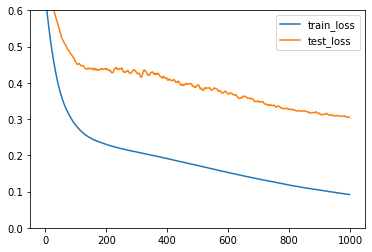


hidden layer node size = 50, data count = 100


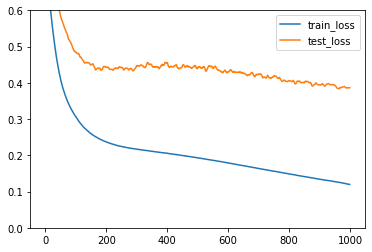


hidden layer node size = 100, data count = 100


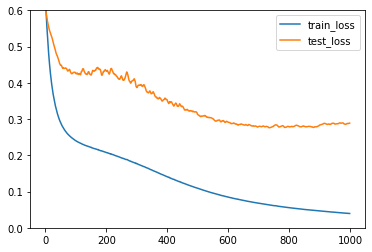


hidden layer node size = 200, data count = 100


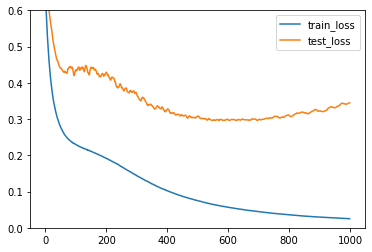


hidden layer node size = 500, data count = 100


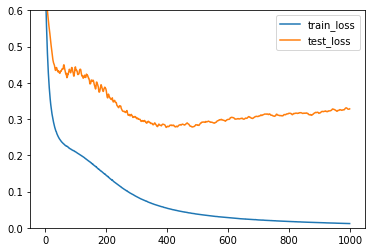

In [ ]:
show_loss(hidden_layer_node_size=5, train_ratio=0.8)
show_loss(hidden_layer_node_size=10, train_ratio=0.8)
show_loss(hidden_layer_node_size=20, train_ratio=0.8)
show_loss(hidden_layer_node_size=30, train_ratio=0.8)
show_loss(hidden_layer_node_size=40, train_ratio=0.8)
show_loss(hidden_layer_node_size=50, train_ratio=0.8)
show_loss(hidden_layer_node_size=100, train_ratio=0.8)
show_loss(hidden_layer_node_size=200, train_ratio=0.8)
show_loss(hidden_layer_node_size=500, train_ratio=0.8)


hidden layer node size = 5, data count = 100


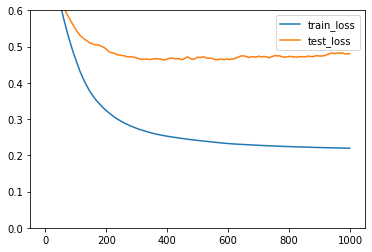


hidden layer node size = 10, data count = 100


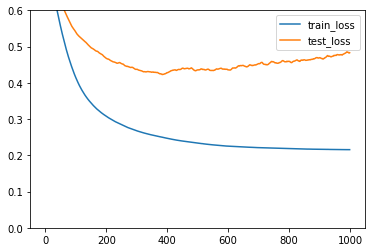


hidden layer node size = 20, data count = 100


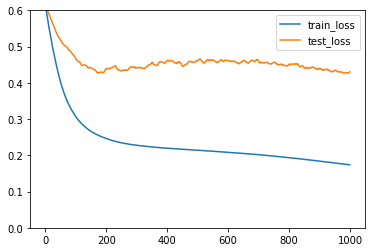


hidden layer node size = 30, data count = 100


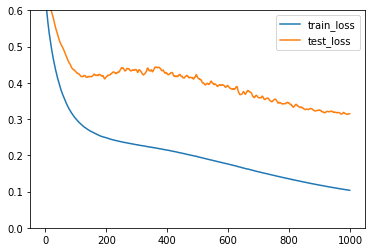


hidden layer node size = 40, data count = 100


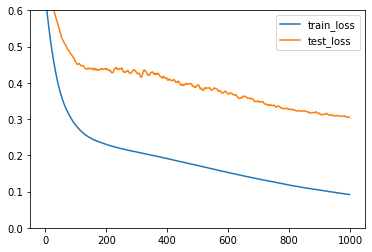


hidden layer node size = 50, data count = 100


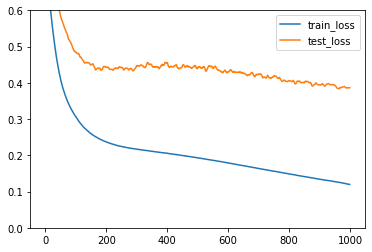


hidden layer node size = 100, data count = 100


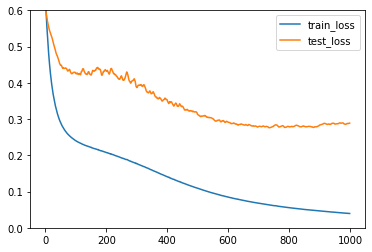


hidden layer node size = 200, data count = 100


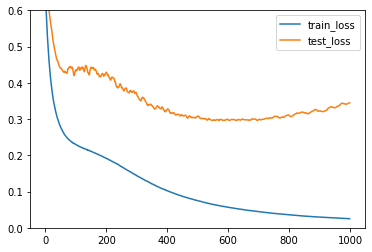


hidden layer node size = 500, data count = 100


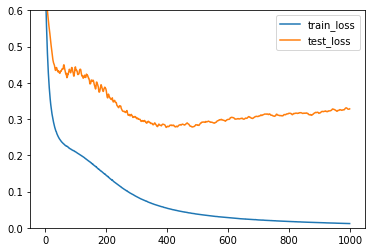

In [ ]:
show_loss(hidden_layer_node_size=5, train_ratio=0.8)
show_loss(hidden_layer_node_size=10, train_ratio=0.8)
show_loss(hidden_layer_node_size=20, train_ratio=0.8)
show_loss(hidden_layer_node_size=30, train_ratio=0.8)
show_loss(hidden_layer_node_size=40, train_ratio=0.8)
show_loss(hidden_layer_node_size=50, train_ratio=0.8)
show_loss(hidden_layer_node_size=100, train_ratio=0.8)
show_loss(hidden_layer_node_size=200, train_ratio=0.8)
show_loss(hidden_layer_node_size=500, train_ratio=0.8)

In [ ]:
def show_loss(hidden_layer_node_size=500, total_data_count=100, train_ratio=0.8):

  print("\nhidden layer node size = {}, data count = {}".format(hidden_layer_node_size, total_data_count))
  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(hidden_layer_node_size, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  epochs = int(1000000 / total_data_count)
  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, verbose=0, batch_size=64)

  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='test_loss')
  plt.legend()
  plt.ylim(0.0, 0.6)
  plt.show()

In [ ]:
def create_data_with_total_size(total_data_count=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_data_count, noise=0.2, random_state=1)

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


# 입출력 관계와 성능

In [68]:
from sklearn.datasets import make_moons

def make_data_with_noise(noise_ratio=0.0, y_noise_ratio=0.0):

  # 데이터 생성
  x, y = make_moons(n_samples=100*5, noise=noise_ratio, random_state=32)

  for i in range(int(len(y)*y_noise_ratio)):
    i1 = np.random.randint(len(y))
    y[i1] = np.abs(y[i1]-1)


  # 데이터 그림 그리기
  df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()


  # 데이터 나누기
  split_index = int(len(x)*0.3)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return train_x, train_y


def train(train_x, train_y):

  model = Sequential()
  model.add(Input(2))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(2, activation="softmax"))
  model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

  history = model.fit(train_x, train_y, epochs=200, batch_size=128, verbose=0, validation_split=0.2)

  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.ylim(0.0, 0.8)
  plt.show()

## 입력 데이터에 노이즈

noise_ratio = 0.0


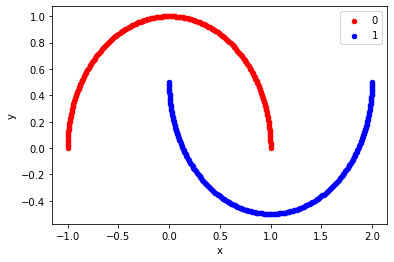

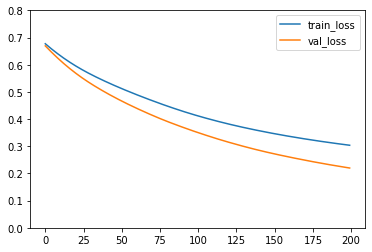

noise_ratio = 0.2


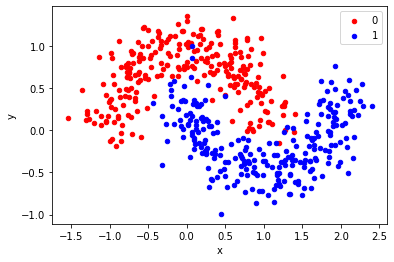

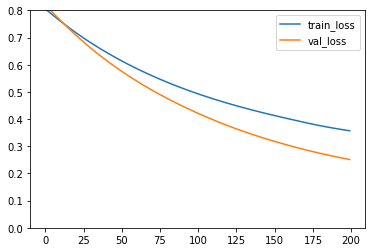

noise_ratio = 0.4


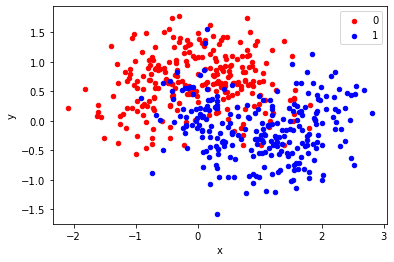

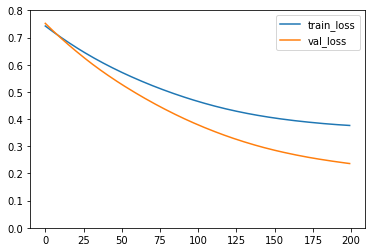

noise_ratio = 0.6


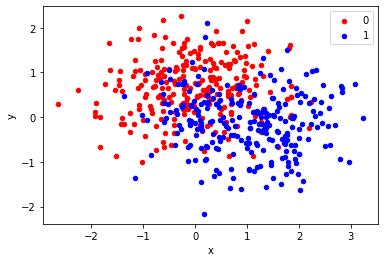

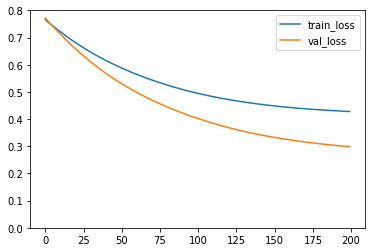

In [64]:
for noise_ratio in [0.0, 0.2, 0.4, 0.6]:
  print("noise_ratio =", noise_ratio)
  train_x, train_y = make_data_with_noise(noise_ratio)
  train(train_x, train_y)

## 출력 데이터에 노이즈

noise_ratio = 0.0


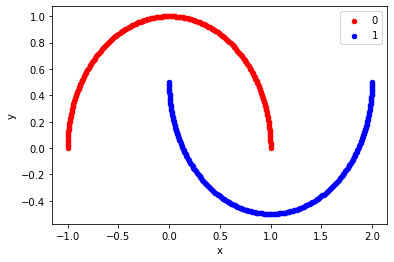

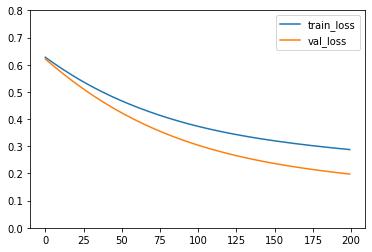

noise_ratio = 0.1


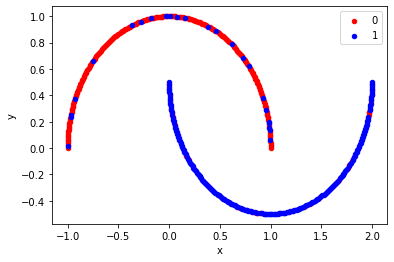

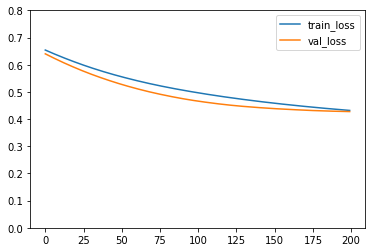

noise_ratio = 0.2


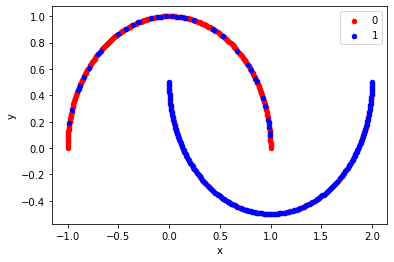

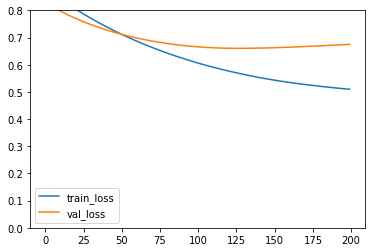

noise_ratio = 0.3


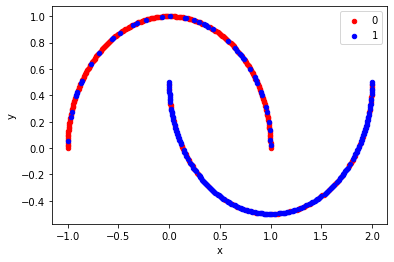

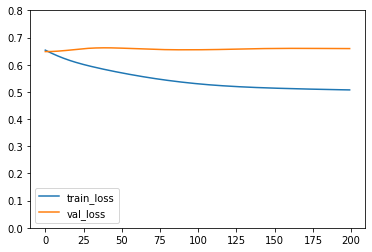

In [69]:
for noise_ratio in [0.0, 0.1, 0.2, 0.3]:
  print("noise_ratio =", noise_ratio)
  train_x, train_y = make_data_with_noise(0.0, y_noise_ratio=noise_ratio)
  train(train_x, train_y)

# 데이터 양과 성능

In [73]:
def create_data_with_total_size(total_data_count=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_data_count, noise=0.5, random_state=1)

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [74]:
def show_loss(total_data_count=100, train_ratio=0.8):

  print("\ndata count = {}".format(total_data_count))
  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(100, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  epochs = int(100000 / total_data_count)
  history = model.fit(train_x, train_y, validation_split=0.1, epochs=epochs, verbose=0, batch_size=128)

  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='test_loss')
  plt.legend()
  plt.ylim(0.0, 1.0)
  plt.show()


data count = 50


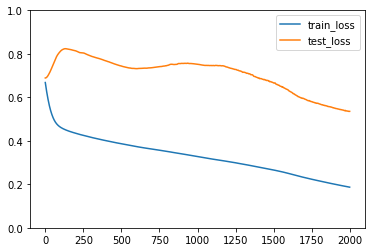


data count = 100


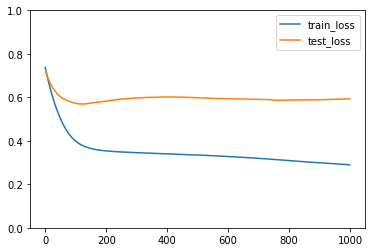


data count = 150


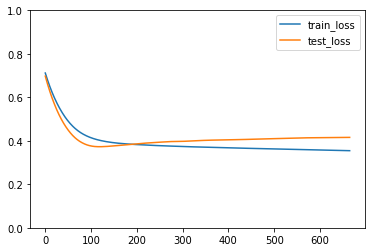


data count = 200


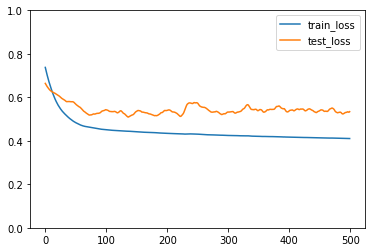


data count = 250


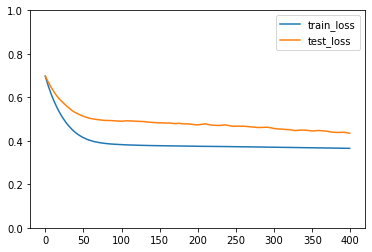

In [75]:
show_loss(total_data_count=50)
show_loss(total_data_count=100)
show_loss(total_data_count=150)
show_loss(total_data_count=200)
show_loss(total_data_count=250)